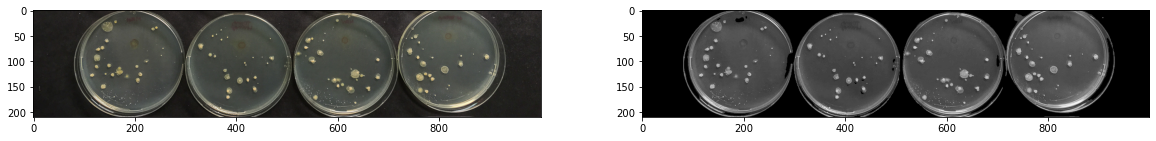

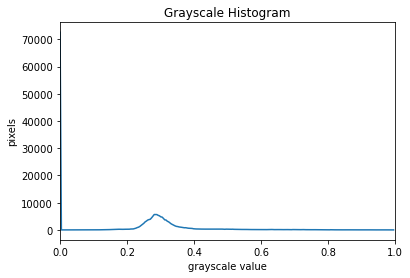

In [9]:
# This is Saleh

from PIL import Image
from PIL import ImageOps

img = Image.open('results_L3.jpg')
#img = ImageOps.grayscale(im)
# img.save('greyscale.png')

import imageio

import matplotlib.pyplot as plt

import scipy.ndimage as ndimage



w, h = img.size
   
# Setting the points for cropped image 
left = 0
top = 0
right = w
bottom = h/3
  

img_1 = img.crop((left, top, right, bottom)) 

left = 0
top = h/3
right = w
bottom = 2*h/3
  

img_2 = img.crop((left, top, right, bottom))  


left = 0
top = 2*h/3
right = w
bottom = h-40
  

img_3 = img.crop((left, top, right, bottom)) 
# Shows the image in image viewer 
#img1.show() 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 20))

#ax1.imshow(img_1, cmap='gray')
#ax2.imshow(img_2, cmap='gray')
#ax3.imshow(img_3, cmap='gray')



img_3.save('lowest_row.png')


import sys
import numpy as np
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer

# get filename, sigma, and threshold value from command line
filename = 'lowest_row.png'
sigma = 1
t = 0.4

image = skimage.io.imread(fname=filename, as_gray=True)

# blur and grayscale before thresholding
#blur = skimage.color.rgb2gray(image)
blur = skimage.filters.gaussian(blur, sigma)

# perform inverse binary thresholding
t = skimage.filters.threshold_otsu(blur)
mask = blur > t

# use the mask to select the "interesting" part of the image
sel = np.zeros_like(image)
sel[mask] = image[mask]

# save binary image; first find beginning of file extension
dot = filename.index(".")
binary_file_name = filename[:dot] + "-binary" + filename[dot:]
skimage.io.imsave(fname=binary_file_name, arr=skimage.img_as_ubyte(sel))


ax1.imshow(img_3, cmap='gray')
ax2.imshow(sel, cmap='gray')


histogram, bin_edges = np.histogram(sel, bins=256, range=(0, 1))

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()


(1000, 750)